# CLaP Classification Gain Visualization
In this notebook, we visualize an example of the classification gain used in CLaP.

In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
import sys

sys.path.append("../../")

import numpy as np
import pandas as pd

from src.visualization import plot_time_series
from src.utils import load_tssb_datasets
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_color_codes()

Let's first load the data and select the example TS.

In [3]:
df_data = load_tssb_datasets()
df_data

,dataset,window_size,change_points,labels,time_series
0,Adiac,10,"[572, 1012, 1232]","[0, 1, 2, 4]","[1.681146, 1.383394, 1.029389, 0.688386, 0.354..."
1,ArrowHead,10,[753],"[0, 1]","[-1.957721, -1.858082, -1.657983, -1.420794, -..."
2,Beef,50,[705],"[0, 1]","[-0.380818, -0.352238, -0.295392, -0.225041, -..."
3,BeetleFly,10,[1280],"[0, 1]","[1.114805, 0.774403, 0.477129, 0.115781, -0.24..."
4,BirdChicken,20,[1280],"[0, 1]","[1.697714, 1.439032, 1.22287, 0.99708, 0.76479..."
...,...,...,...,...,...
70,UWaveGestureLibraryX,10,"[600, 1131, 1652, 2193]","[0, 1, 2, 3, 4]","[-0.889766, 0.722005, 0.869297, -0.553167, -0...."
71,UWaveGestureLibraryY,10,"[600, 1131, 1652, 2193]","[0, 1, 2, 3, 4]","[-1.523467, -0.106794, 0.190361, 0.979247, 0.3..."
72,UWaveGestureLibraryZ,10,"[600, 1131, 1652, 2193]","[0, 1, 2, 3, 4]","[-0.527058, 0.416111, -0.524027, 0.41141, 0.12..."
73,WordSynonyms,10,"[202, 2227]","[0, 1, 2]","[-1.183581, -0.514028, -0.480539, -0.394855, -..."


In [4]:
idx = 15
data_row = df_data.iloc[idx]

Now, we load the classification gains (and other scores) for the example.

In [5]:
scores = {}
losses = {}

scores["cgain"] = pd.read_csv("scores/clap_cgain.csv").cgain.to_numpy()
scores["F1"] = pd.read_csv("scores/clap_f1_score.csv").f1_score.to_numpy()
scores["AMI"] = pd.read_csv("scores/clap_adjusted_mutual_info_score.csv").adjusted_mutual_info_score.to_numpy()
losses["Entropy"] = pd.read_csv("scores/clap_neg_log_loss.csv").neg_log_loss.to_numpy()
losses["Hamming"] = pd.read_csv("scores/clap_neg_hamming_loss.csv").neg_hamming_loss.to_numpy()

We plot the TS and scores.

/var/folders/1m/8xt9fm8d1575s4p3vrgccf7r0000gn/T/ipykernel_6777/3841384611.py:14: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize)
/var/folders/1m/8xt9fm8d1575s4p3vrgccf7r0000gn/T/ipykernel_6777/3841384611.py:17: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize)


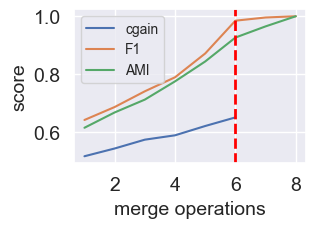

In [6]:
fontsize = 14

_, ax = plt.subplots(1, figsize=(3, 2))

for score_name, values in scores.items():
    ax.plot(np.arange(1, len(values) + 1), values, label=score_name)

ax.axvline(x=6, linewidth=2, color='red', linestyle="dashed")

ax.set_xlabel("merge operations", fontsize=fontsize)
ax.set_ylabel("score", fontsize=fontsize)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

ax.legend(loc=2, prop={'size': fontsize - 4})
plt.savefig(f"../../figures/merge_scores.pdf", bbox_inches="tight")

/var/folders/1m/8xt9fm8d1575s4p3vrgccf7r0000gn/T/ipykernel_6777/2246047387.py:14: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize)
/var/folders/1m/8xt9fm8d1575s4p3vrgccf7r0000gn/T/ipykernel_6777/2246047387.py:17: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize)


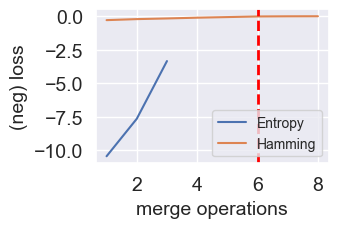

In [7]:
fontsize = 14

_, ax = plt.subplots(1, figsize=(3, 2))

for loss_name, values in losses.items():
    ax.plot(np.arange(1, len(values) + 1), values, label=loss_name)

ax.axvline(x=6, linewidth=2, color='red', linestyle="dashed")

ax.set_xlabel("merge operations", fontsize=fontsize)
ax.set_ylabel("(neg) loss", fontsize=fontsize)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

ax.legend(loc=4, prop={'size': fontsize - 4})
plt.savefig(f"../../figures/merge_losses.pdf", bbox_inches="tight")

<Figure size 640x480 with 0 Axes>

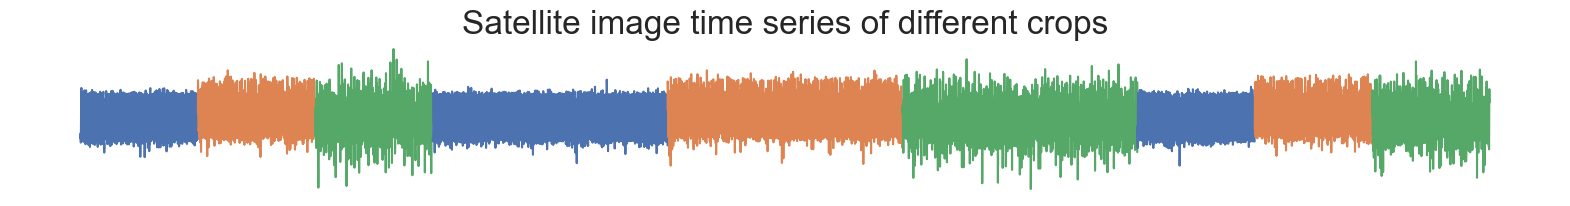

In [8]:
ax = plot_time_series("Satellite image time series of different crops", data_row.time_series,
                      change_points=data_row.change_points, labels=data_row.labels, file_path=None, font_size=24)

ax.set_facecolor((1., 1., 1.))

ax.tick_params(
    axis='both',
    which='both',
    labelbottom=False,
    labelleft=False
)

plt.savefig(f"../../figures/crop.pdf", bbox_inches="tight")